# Heart Attack Risk Prediction using Logistic Regression 

This notebook presents a complete workflow for predicting the risk of heart attack using Logistic Regression. The steps include data preprocessing, visualization, model building, hyperparameter tuning, and evaluation using appropriate metrics and graphs.

Dataset: A cleaned and scaled heart disease dataset (270 rows x 13 features) with numeric and normalized values. The 'Target' column is the binary output class.

# Key Steps Performed:
1. **Data Loading & Preprocessing:**
 - Handled unnamed column header.
 - Assigned proper column names.
 - Verified data types and confiremd no missing values.
2. **Train - Test Split:**
 - Split dataset into train and test sets (80/20 split).
 - Considered using stratification but found class distribution manageable.
3. **Modelling:**
 - Apllied 'LogisticRegression' wrapped in a pipeline.
 - Used 'GridSearchCV' to optimize hyperparameters (e.g , penalty, C, solver).
4. **Evaluation:**
 - Evaluated accuracy, precision , recall, F1- score, ROC AUC.
5. **Visualization:**
 - Plotted :
     - Predicted Probability Distribution
     - Calibration Curve
     - Logistic Regression Coefficients
     - Precision-Recall Cruve
     - ROC Curve
 - Each graph used distince colors for clarity.

Tools/Libraries Used : 
 - pandas,numpy,matplotlib,seaborn
 - scikit-learn: LogisticRegression, GridSearchCV, metrics,model_selection

This project can serve as a base template for binary classification ML tasks using Logistic Regrssion . 
Feel free to fork , star , and build upon this repository. 

In [11]:
import pandas as pd 

In [16]:
sample = pd.read_csv("heart-270-13-2.csv",header =None,nrows=1)
print("No. of rows in the dataset",sample.shape[1])

No. of rows in the dataset 14


# Data Visualization 

In [24]:
col_name = [f'feature_{i}' for i in range(1,14)]
col_name[-1] = 'Target'

**Naming the Columns**

In [27]:
df =pd.read_csv("heart-270-13-2.csv",header=None,names=col_name)

In [32]:
print(df.head())
print(df.info())

          feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0.854167          1   1.000000   0.339623   0.447489          0        1.0   
0.791667          0   0.666667   0.198113   1.000000          0        1.0   
0.583333          1   0.333333   0.283019   0.308219          0        0.0   
0.729167          1   1.000000   0.320755   0.312785          0        0.0   
0.937500          0   0.333333   0.245283   0.326484          0        1.0   

          feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0.854167   0.290076          0   0.387097         0.5    1.000000         0.0   
0.791667   0.679389          0   0.258065         0.5    0.000000         1.0   
0.583333   0.534351          0   0.048387         0.0    0.000000         1.0   
0.729167   0.259542          1   0.032258         0.5    0.333333         1.0   
0.937500   0.381679          1   0.032258         0.0    0.333333         0.0   

          Target  
0.854167       2  
0.7916

In [33]:
df.reset_index(drop=True, inplace=True)


In [34]:
print(df.head())
print(df.info())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          1   1.000000   0.339623   0.447489          0        1.0   
1          0   0.666667   0.198113   1.000000          0        1.0   
2          1   0.333333   0.283019   0.308219          0        0.0   
3          1   1.000000   0.320755   0.312785          0        0.0   
4          0   0.333333   0.245283   0.326484          0        1.0   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  Target  
0   0.290076          0   0.387097         0.5    1.000000         0.0       2  
1   0.679389          0   0.258065         0.5    0.000000         1.0       1  
2   0.534351          0   0.048387         0.0    0.000000         1.0       2  
3   0.259542          1   0.032258         0.5    0.333333         1.0       1  
4   0.381679          1   0.032258         0.0    0.333333         0.0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (t

In [36]:
df['Target'].value_counts()

Target
1    150
2    120
Name: count, dtype: int64

# Plotting Various Comparison Graphs

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt

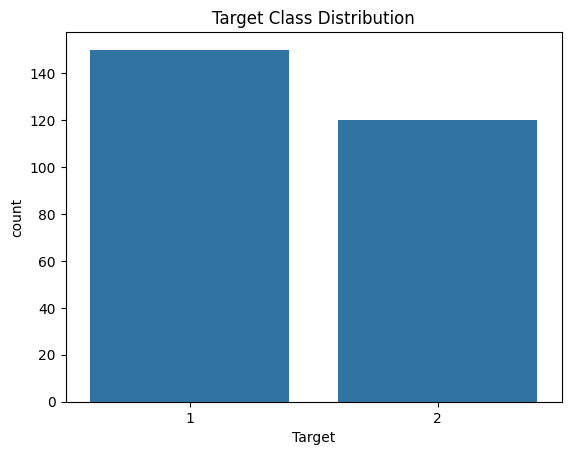

In [38]:
sns.countplot(x='Target',data=df)
plt.title("Target Class Distribution")
plt.show()

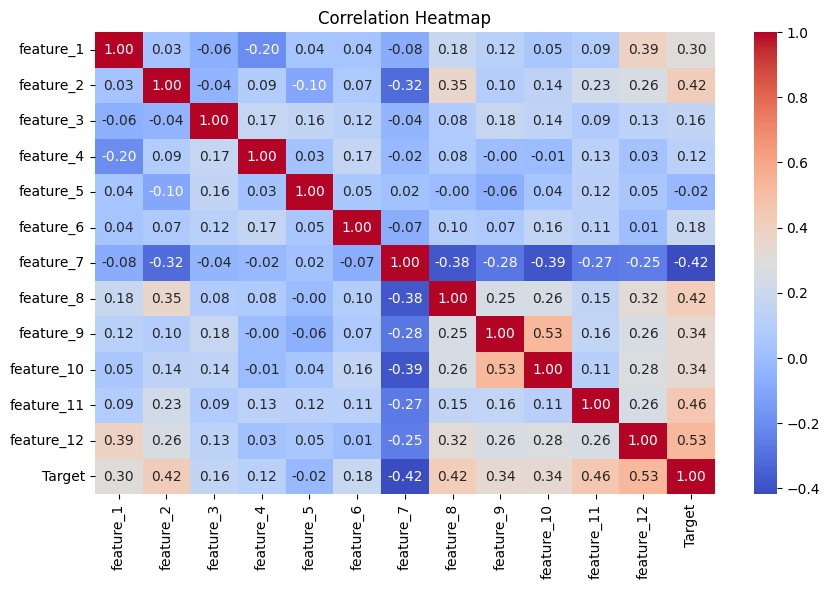

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Splitting the dataset
 Below we split the dataset using **scikit-learn train_test_split** with a train/test split of **80/20%**  

In [41]:
from sklearn.model_selection import train_test_split 

In [44]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# Using GridSearchCV and Implementing Logistic Regression
Now we use **GridSearchCV** for Hyperparameter tuning for the model and implement **Logistic Regression** to predict the values for our Machine. 

For **GridSearchCV** we initialied various parameters in the **parameter grid** such as **C,penalty** and predicted the Values for the Machine.

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [47]:
logic = LogisticRegression(solver='liblinear')

In [49]:
param_grid = {
    'C' : [0.01,0.1,1,10,100],
              'penalty':['l1','l2']
             }

In [50]:
grid = GridSearchCV(logic,param_grid,cv=5,scoring='accuracy')

In [51]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [56]:
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [57]:
print(f"Bestt score : {grid.best_score_}")

Bestt score : 0.8289640591966172


In [58]:
best_model = grid.best_estimator_

In [59]:
best_model

LogisticRegression(C=1, solver='liblinear')

# Prediction and Evaluation 
Now after implementing the **Logistic Regression** we here perdict the values and evaluate it with using various evaluation parameters such as **Accuracy, Precision, recall score, F1 score, ROC AUC** and also showed the **Classification report**

In [60]:
y_pred = best_model.predict(X_test)

In [61]:
y_pred

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2], dtype=int64)

In [62]:
print(f"Test Accuracy : {accuracy_score(y_test,y_pred)}")

Test Accuracy : 0.9074074074074074


In [63]:
print(f"Test Precision : {precision_score(y_test,y_pred)}")

Test Precision : 0.8888888888888888


In [64]:
print(f"Classification Report: {classification_report(y_test,y_pred)}")

Classification Report:               precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [67]:
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1])

In [68]:
print(f"Recall Score : {recall}")


Recall Score : 0.9696969696969697


In [69]:
print(f"f1 Score : {f1}")

f1 Score : 0.927536231884058


# Various Evaluation Visuals 
Now using **Seaborn** and **matplotlib** we plotted various evaluation graphs and used them to represent the **Confusion Matrix , ROC Curve, Precision-Recall Display, Logistic Regression Coefficients, Probability Distributions, and Calibration Curve**

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

In [70]:
print(f"ROC AUC Score : {roc_auc}")

ROC AUC Score : 0.9437229437229436


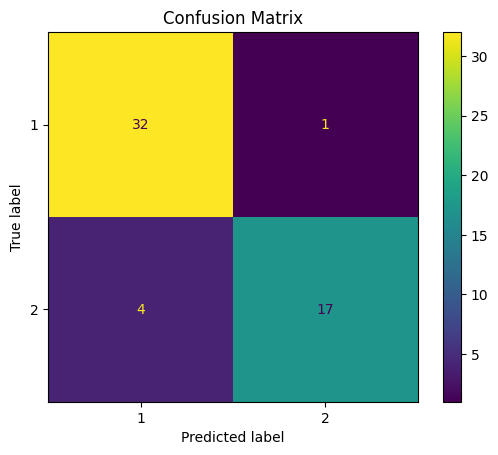

In [72]:
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)
plt.title("Confusion Matrix")
plt.show()

In [73]:
from sklearn.metrics import RocCurveDisplay

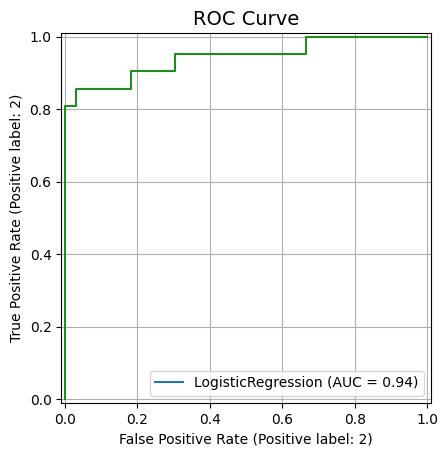

In [96]:
disp = RocCurveDisplay.from_estimator(best_model,X_test,y_test,pos_label=2)
disp.line_.set_color("forestgreen")
plt.title("ROC Curve",fontsize=14)
plt.grid(True)
plt.show()

In [76]:
from sklearn.metrics import PrecisionRecallDisplay


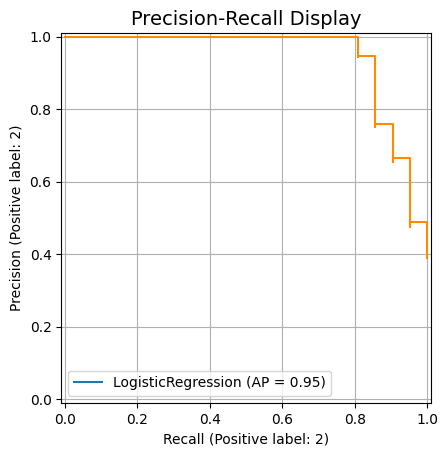

In [93]:
disp = PrecisionRecallDisplay.from_estimator(best_model,X_test,y_test,pos_label=2)
disp.line_.set_color("darkorange")
plt.title("Precision-Recall Display",fontsize=14)
plt.grid(True)
plt.show()

In [79]:
import numpy as np 

In [83]:
coefficients = best_model.coef_[0]
feature_names = X.columns  


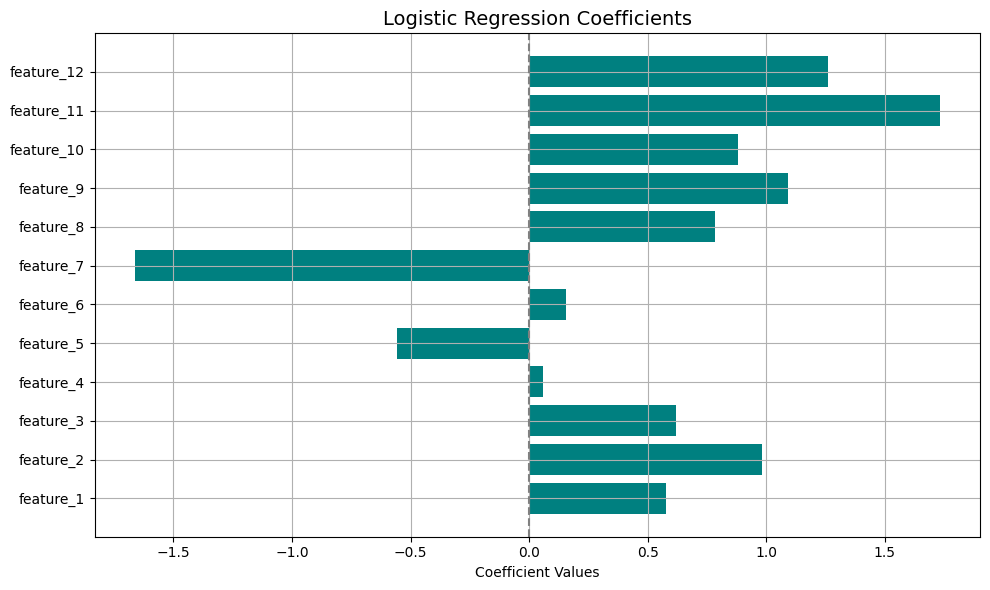

In [91]:
plt.figure(figsize=(10,6))
bars = plt.barh(feature_names,coefficients,color='teal')
plt.axvline(0,color='gray',linestyle='--')
plt.title("Logistic Regression Coefficients",fontsize=14)
plt.xlabel("Coefficient Values")
plt.grid(True)
plt.tight_layout()
plt.show()

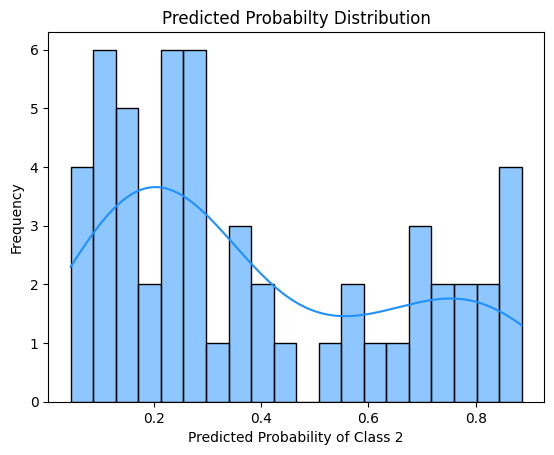

In [88]:
y_probs = best_model.predict_proba(X_test)[:,1]
sns.histplot(y_probs,bins=20,kde=True,color='dodgerblue')
plt.title("Predicted Probabilty Distribution")
plt.xlabel("Predicted Probability of Class 2")
plt.ylabel("Frequency")
plt.show()

In [86]:
from sklearn.calibration import CalibrationDisplay

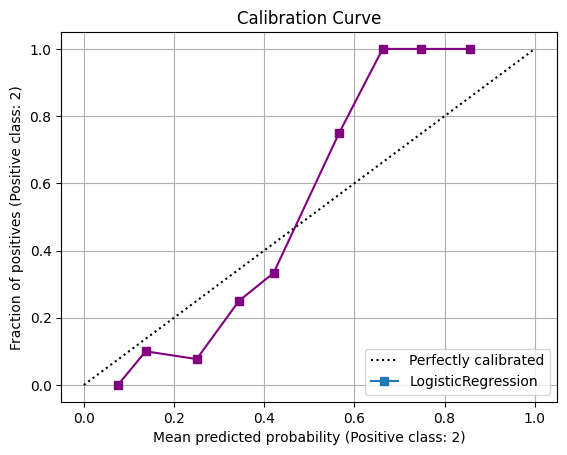

In [90]:
CalibrationDisplay.from_estimator(best_model,X_test,y_test,n_bins=10,pos_label=2)
plt.title("Calibration Curve")
plt.grid(True)
plt.gca().lines[0].set_color('black')
plt.gca().lines[1].set_color('purple')
plt.show()